In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from modules.load_data import load_df
from modules.randForest import profile_correlation as rfpc
from modules.randForest import CustomRandomForestRegressor as CRF
from modules.nn import profile_correlation as nnpc

In [4]:
df = load_df()
df.head()

,Temperature (C),pH,Turbidity (NTU),BOD (mg/l),Fecal Coliform (MPN/100ml),Disolved Oxygen (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Conductivity (micro_mhos/cm)
0,30.6,7.5,47.0,48.9,5421,4.0,0.13,208
1,30.6,7.2,45.8,47.0,5632,4.0,0.12,210
2,30.6,7.1,45.4,48.1,5550,4.0,0.10,219
3,30.6,7.1,45.6,48.9,5444,4.0,0.12,220
4,30.6,7.2,46.0,47.0,5218,3.9,0.13,215


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:16<00:00,  2.12s/it]


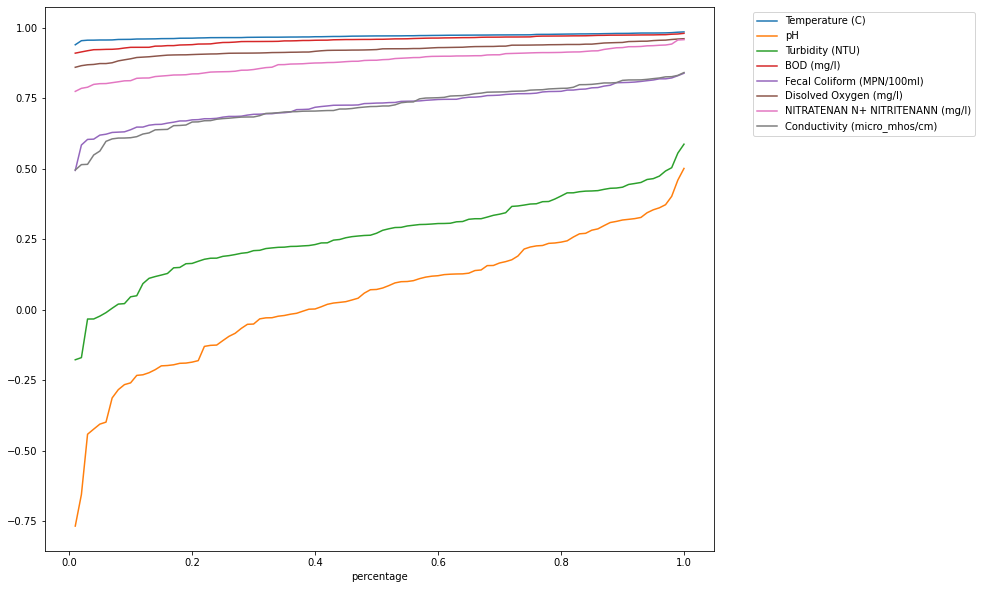

In [11]:
%matplotlib inline
ax, df_r = rfpc(df)

### Issues with NN
- The nn has more hyper parameters to tune (the random forest does not)
- The nn is more compute intense on training
- The nn has issues with convergence during training


NN training is done differently t

In [13]:
import warnings
warnings.filterwarnings('ignore')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:19<00:00,  9.89s/it]


(-2.0, 2.0)

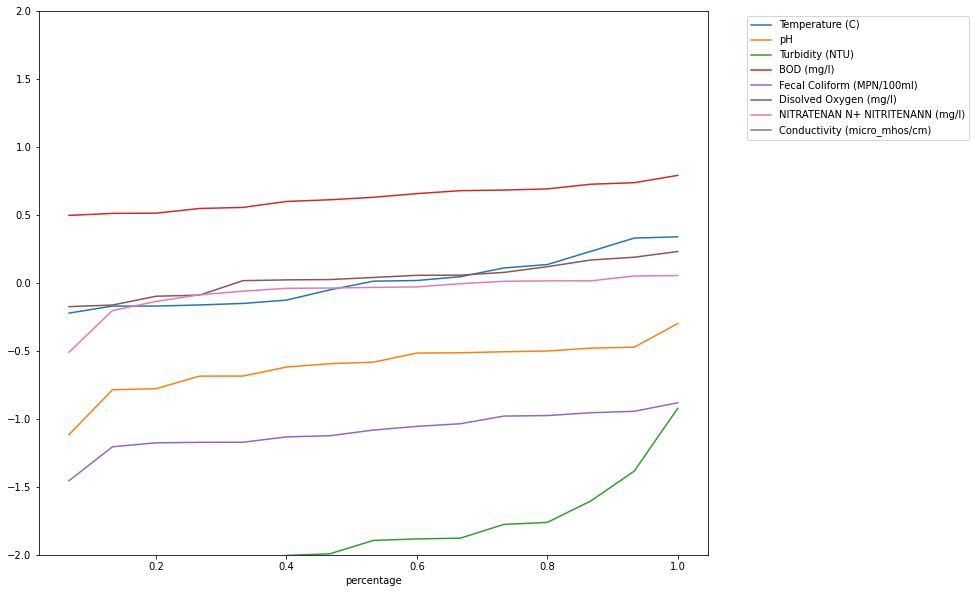

In [19]:
%matplotlib inline
ax, fig = nnpc(df, no_iters=15)
ax.set_ylim([-2, 2])

In [ ]:
df.shape

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
df.boxplot(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [ ]:
import seaborn as sns
sns.displot(df)

In [5]:
norm_df = (df - df.min())/(df.max() - df.min())
df_gauss_norm = (df - df.mean())/df.std()

In [ ]:
sns.displot(df_gauss_norm)

# Objective:
Look at correlation

In [ ]:
df_gauss_norm.corr()

In [ ]:
df_ = df
cols = list(df_.columns)
# Dissolved Oxygen is a enumerated variable
df_.plot.scatter(x=cols[0], y=cols[6])

In [ ]:

x_names = list(df_.columns)
y = 5
y_name = x_names.pop(5)
print(x_names, y_name)
X = df_[x_names]
Y = df_[y_name]
print(len(x_names))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [ ]:
reg = RandomForestRegressor(n_estimators=7, random_state=191)
reg.fit(x_train, y_train)

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
from modules.randForest import CustomRandomForestRegressor as CRF

In [ ]:
n = 200
r2s = np.zeros((n, ))
for i in range(n):
    obj = CRF(df_, y_name, random_state=True)
    r2s[i] = obj.r2()

In [ ]:
fig, ax = plt.subplots(1,1)
ax.scatter(np.arange(n)/n, sorted(r2s))

In [ ]:
from modules.nn import NN

In [ ]:
df.shape

In [ ]:
y_name = list(df.columns)[0]
obj = NN(df, y_name, hidden_layer_sizes=100)